# Decision Trees

In [2]:
import sklearn
import numpy as np
import pandas as pd

import graphviz 
from sklearn import tree
from io import StringIO

## Load Data

In [3]:
col_names = "rain,hot temp,mild temp,high humidity,strong winds,playTennis"
my_tennis_data = np.array([[0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 1, 0]])

tennis_df = pd.DataFrame(data=my_tennis_data, columns=col_names.split(","))

In [4]:
tennis_df

,rain,hot temp,mild temp,high humidity,strong winds,playTennis
0,0,1,0,1,0,0
1,0,1,0,1,1,0
2,1,0,1,1,0,1
3,1,0,0,0,0,1
4,1,0,0,0,1,0
5,0,0,1,1,0,1
6,0,0,0,0,0,1
7,1,0,1,0,0,1
8,0,0,1,0,1,1
9,1,0,1,1,1,0


In [5]:
x = tennis_df.drop(["playTennis"], axis=1)
y = tennis_df["playTennis"]
print(x.shape, y.shape)

(10, 5) (10,)


## DecisionTree Classifier

In [6]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [7]:
clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

In [8]:
ss = StringIO() # Treats a string as file

feature_names = x.columns
label_name = ["Didn't Play Tennis", "Played Tennis"]

tree.export_graphviz(clf, feature_names=feature_names, class_names=label_name, label="all", out_file=ss)

In [9]:
ss.getvalue()

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="hot temp <= 0.5\\nentropy = 0.971\\nsamples = 10\\nvalue = [4, 6]\\nclass = Played Tennis"] ;\n1 [label="strong winds <= 0.5\\nentropy = 0.811\\nsamples = 8\\nvalue = [2, 6]\\nclass = Played Tennis"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 5\\nvalue = [0, 5]\\nclass = Played Tennis"] ;\n1 -> 2 ;\n3 [label="rain <= 0.5\\nentropy = 0.918\\nsamples = 3\\nvalue = [2, 1]\\nclass = Didn\'t Play Tennis"] ;\n1 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = Played Tennis"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 2\\nvalue = [2, 0]\\nclass = Didn\'t Play Tennis"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 2\\nvalue = [2, 0]\\nclass = Didn\'t Play Tennis"] ;\n0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

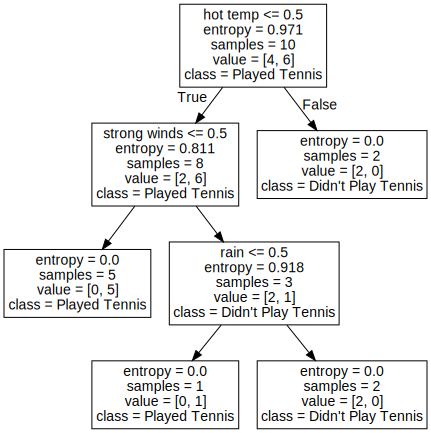

In [10]:
graphviz.Source(ss.getvalue())

## Visualizing the Tree

In [11]:
print(x[-2:])
print("predicted:", clf.predict(x[-2:])) # The last two lines
print("ground truth:", y[-2:].values)

   rain  hot temp  mild temp  high humidity  strong winds
8     0         0          1              0             1
9     1         0          1              1             1
predicted: [1 0]
ground truth: [1 0]


## Naive Bayes 

In [12]:
from sklearn import naive_bayes

In [15]:
# Features
x = my_tennis_data[:,:-1]
# Classes
y = my_tennis_data[:, -1]

In [16]:
clf = naive_bayes.BernoulliNB()
clf.fit(x,y)

BernoulliNB()

In [20]:
print(clf.predict(x[-2:, :]))
print(y[-2:])


[[0 0 1 0 1]
 [1 0 1 1 1]]
[1 1]
[1 0]


In [21]:
clf.predict_proba(x[-2:,:])

array([[0.2241804 , 0.7758196 ],
       [0.49062706, 0.50937294]])